# Example 6 #

Tuning the hyper-parameters of LS-SVM regression models using the scikit-learn GridsearchCV function.
The synthetic data used for this purpose is the N-dimensionsal Sinc function, which in terms or radial distance and angles in N dimensions, would correspond to a 1D sinc function over the radial distance. The goal of this setup is to investigate the impact of the number of dimensions on how the "size" of the data set is considered by the LS-SVM model: "small data" or "large data".

In [1]:
#Some imports
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import scipy.stats as st
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut, KFold

from LSSVMRegression import LSSVMRegression

In [18]:
#Generating the synthetic data
Nmodels=100
Ndims=2
Ndata=50
Nrem=int(Ndata*0.2)
r=np.random.uniform(low=-4,high=4,size=(Ndims,Ndata)).T # N-D euclidian position-vector
x=np.array([np.sqrt(np.sum(r*r,axis=1))]).T # get the euclidian "radial distance" as positive scalar
y=np.sinc(x).ravel()  #create the associated targets, needs to be a 1D array
#y=np.sin(x).ravel()  #create the associated targets, needs to be a 1D array
y=y+(x*x*0.1).ravel()
x2=x*x
print("mean x²=",np.mean(x2))
print("R=",r.shape,"\nX=",x.shape)

mean x²= 10.65683708322873
R= (50, 2) 
X= (50, 1)


In [38]:
#create Nmodels (identical) rbf-models to train on different datasets
models=list()
datasets_r=list()
datasets_y=list()
for i in range(Nmodels):
    clfrbf=LSSVMRegression(
        gamma=1.0e-1,       #set the gamma-hyper parameter equal to 1
        kernel='poly', #use the linear kernel
        sigma=1.0,
        c=1.02,
        d=2,
            )
    #index=list(range(i,i+Nrem))
    index=random.sample(range(Ndata),Nrem)
    seti_r=np.array(np.delete(r,index,axis=0)) #remove selected vector rows
    #print(seti_r.shape,seti_r)
    #print(seti_r.shape," ",seti_r[0:5,:].ravel())
    seti_y=np.delete(y,index)
    clfrbf.fit(seti_r,seti_y) # train our model instance, aka solve the set of linear equations
    if i in (0,1):
        print("coefficients: ",clfrbf.coef_,"\n Average Coef: ",np.mean(clfrbf.coef_)," +-",np.std(clfrbf.coef_))
    datasets_r.append(seti_r)
    datasets_y.append(seti_y)
    models.append(clfrbf)
    print(i,",",end=" ")

coefficients:  [-0.00023971  0.00797641 -0.00158639 -0.01288889 -0.00264142 -0.00741028
  0.00504008  0.01233427 -0.00491576 -0.01249846  0.00189462 -0.00768979
  0.01329144  0.01510997  0.00999196 -0.00219833  0.01437833  0.006166
 -0.00414388  0.00751342  0.0015778  -0.00033431  0.00184189 -0.01825272
 -0.00411221 -0.00787367 -0.00835748 -0.00602912 -0.00521263  0.01382437
 -0.0015502   0.01165219 -0.00191365 -0.01883586 -0.01239383 -0.00370886
  0.00919963 -0.0016521   0.00948844  0.00515874] 
 Average Coef:  1.2490009027033011e-17  +- 0.008878920940375849
0 , coefficients:  [ 0.0072505   0.00402983 -0.00051594 -0.00264309 -0.01101928  0.01294287
 -0.0027103  -0.00779774  0.00585489 -0.00269308 -0.01074381  0.00275363
 -0.00660926  0.01424444  0.0115195  -0.00145573  0.0081684  -0.00206856
 -0.00128126 -0.00436554 -0.00351825  0.00587283 -0.00033512 -0.00087
 -0.00572887 -0.01614314 -0.00638527 -0.00751743 -0.00668281 -0.00485451
  0.01483275 -0.0010282   0.01388411 -0.00320792 -0.0

In [39]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    cf=(1.0-confidence)*0.5
    qm = np.quantile(a,cf,interpolation='linear')
    qp = np.quantile(a,1.0-cf,interpolation='linear')
    return m, m-h, m+h, qm, qp

MAE: 0.010    R²: 0.998
MAE: 0.009    R²: 0.998
MAE: 0.015    R²: 0.996
MAE: 0.009    R²: 0.998
MAE: 0.010    R²: 0.998
MAE: 0.009    R²: 0.998
MAE: 0.015    R²: 0.997
MAE: 0.011    R²: 0.997
MAE: 0.008    R²: 0.998
MAE: 0.012    R²: 0.997
MAE: 0.013    R²: 0.997
MAE: 0.012    R²: 0.997
MAE: 0.013    R²: 0.997
MAE: 0.010    R²: 0.998
MAE: 0.017    R²: 0.996
MAE: 0.009    R²: 0.998
MAE: 0.013    R²: 0.997
MAE: 0.016    R²: 0.996
MAE: 0.021    R²: 0.995
MAE: 0.018    R²: 0.996
MAE: 0.021    R²: 0.995
MAE: 0.019    R²: 0.996
MAE: 0.011    R²: 0.997
MAE: 0.013    R²: 0.997
MAE: 0.014    R²: 0.997
MAE: 0.029    R²: 0.993
MAE: 0.010    R²: 0.998
MAE: 0.013    R²: 0.997
MAE: 0.010    R²: 0.998
MAE: 0.010    R²: 0.998
MAE: 0.013    R²: 0.997
MAE: 0.028    R²: 0.994
MAE: 0.020    R²: 0.995
MAE: 0.019    R²: 0.995
MAE: 0.014    R²: 0.997
MAE: 0.015    R²: 0.997
MAE: 0.013    R²: 0.997
MAE: 0.017    R²: 0.996
MAE: 0.016    R²: 0.996
MAE: 0.013    R²: 0.997
MAE: 0.013    R²: 0.997
MAE: 0.012    R²

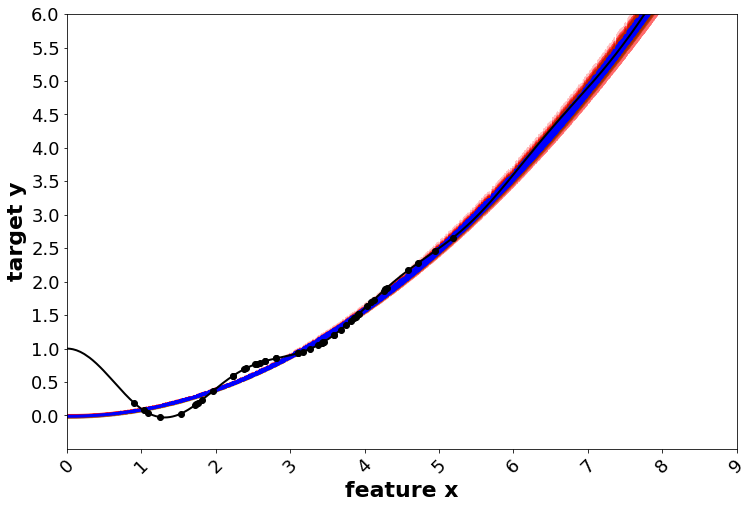

In [40]:
#generate a dens mesh
xmin=0
xmax=8.5
Npts=10000  # number of points, randomly selected in the Ndims dimensional space. (To prevent things from accidentaly exploding)
if Ndims==1:
    #generate Ndim grid
    rPred=np.linspace((xmin,),(xmax,),Npts)
elif Ndims==2:
    #2D sperical grid with uniform random distribution in sphere 
    rPred=np.zeros((2,Npts)).T
    for i in range(1,Npts):
        L=2*xmax
        while L>xmax: #repeat until in circle
            xy=np.random.uniform(low=0,high=xmax,size=2)
            L=np.sqrt(np.sum(xy*xy))
        rPred[i,0:2]=xy[0:2]    
elif Ndims==3:
    #3D sperical grid with uniform random distribution in sphere 
    rPred=np.zeros((3,Npts)).T
    for i in range(1,Npts):
        L=2*xmax
        while L>xmax: #repeat until in sphere
            xyz=np.random.uniform(low=0,high=xmax,size=3)
            L=np.sqrt(np.sum(xyz**2))
        rPred[i,0:3]=xyz[0:3]
else :
    rPred=np.random.uniform(low=0,high=xmax,size=(Ndims,Npts)).T # N-D euclidian position-vector
    
xPred=np.array([np.sqrt(np.sum(rPred*rPred,axis=1))]).T # get the euclidian "radial distance" as positive scalar

#The randomness of the x's gives some issues for plotting purposes, so sort everything wrt the radial value x
indexSort=np.argsort(xPred,axis=0).ravel()
xPred=np.sort(xPred,axis=0)
rPred=rPred[indexSort[::1]]

yExact=np.sinc(xPred).ravel()
#yExact=np.sin(xPred).ravel()
yExact=yExact+(xPred*xPred*0.1).ravel()


yAvg=np.zeros(Npts)
CIlow=np.zeros(Npts)
CIhigh=np.zeros(Npts)
Qlow=np.zeros(Npts)
Qhigh=np.zeros(Npts)
# and predict
all_yPred=list()
yPred2D=np.zeros((Nmodels,Npts))
cnt=-1

ERRORS=np.zeros((Nmodels,2))
for clfrbf in  models:
    cnt+=1
    yPred=clfrbf.predict(rPred)
    all_yPred.append(yPred)
    yPred2D[cnt]=yPred
    # The mean squared error (MAE) and The coefficient of determination R²: 1 is perfect prediction
    ERRORS[cnt,0]=mean_squared_error(yExact, yPred)
    ERRORS[cnt,1]=r2_score(yExact, yPred)
    print('MAE: %.3f    R²: %.3f' % (mean_squared_error(yExact, yPred), r2_score(yExact, yPred)))

print("Average scores -- MAE= ",np.mean(ERRORS[:,0])," R²= ",np.mean(ERRORS[:,1]))
    
for i in range(Npts):
    yAvg[i], CIlow[i], CIhigh[i], Qlow[i], Qhigh[i]= mean_confidence_interval(yPred2D[:,i],confidence=0.9)
    #print(yExact[i],"=?=",yAvg[i], CIlow[i], CIhigh[i],"--> ",yPred2D[1:5,i])
    
# Plot outputs
plt.figure(figsize=(12,8))
for yPred in all_yPred:
    plt.plot(xPred, yPred,   color='red'  ,linewidth=1, zorder=-1, alpha=0.25)

plt.fill_between(xPred.ravel(), CIlow, CIhigh, color='blue', zorder=0, alpha=.5)
plt.fill_between(xPred.ravel(), Qlow, Qhigh, color='green', zorder=0, alpha=.25)
plt.plot(xPred, yAvg,  color='blue',linewidth=3, zorder=0)

plt.plot(xPred, yExact,  color='black',linewidth=2, zorder=0)
plt.scatter(x, y,  color='black', zorder=1)

#plt.axis([xmin,xmax,-.5,26])
plt.axis([xmin,8,-.5,6])
step=(xmax-xmin)/11.0
Xlst=list()
for a in np.arange(math.floor(xmin),math.ceil(xmax)+1,1.0):
    Xlst.append(a)
plt.xticks(Xlst,rotation=45,fontsize=18)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
#plt.yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0,1.25,1.5],fontsize=18)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6],fontsize=18)
plt.xlabel("feature x",fontsize=22,fontweight="bold")
plt.ylabel("target y",fontsize=22,fontweight="bold")

plt.show()

In [28]:
#sklearn gridsearch
#CrossVal=LeaveOneOut()
CrossVal=KFold(n_splits = 5, shuffle = True)
params=dict()
#Gamma=[1.0e-6,1.0e-5,1.0e-4,1.0e-3,1.0e-2,0.1,1.0,10.0,100.0,1.0e3,1.0e4,1.0e5,1.0e6]
Gamma=[1.0e-13,1.0e-12,1.0e-11,1.0e-10,1.0e-9,1.0e-8,1.0e-7,1.0e-6,1.0e-5,1.0e-4,1.0e-3,1.0e-2,0.1,1.0,10.0,100.0,1.0e3,1.0e4,1.0e5,1.0e6,1.0e7,1.0e8,1.0e9,1.0e10,1.0e11,1.0e12]
#Factors=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#Factors=np.array([1,2,3,4,5,6,7,8,9])
Factors=np.array([1,4,7])
GammaDens=list()
for g in Gamma:
    GammaDens.extend(Factors*g)

ptune='c'   # gamma(float), c(float) or d (int)
scalename='log' #"linear", "log", "symlog", "logit",
#ptune='d'   # gamma(float), c(float) or d (int)
#scalename='linear' #"linear", "log", "symlog", "logit",


params[ptune]=GammaDens

CVmodels=list()
scoreX = GammaDens
scoreY=np.zeros((Nmodels,len(GammaDens)))
#for i in range(5):
for i in range(Nmodels):
    print(i,",",end=" ")
    mod=models[i]
    CVmodel = GridSearchCV(
                mod, # our estimator
                param_grid=params, # dictionary with our possible hyper-parameters
                scoring='neg_mean_squared_error', #This gives the same type of scoring as the lasso CV
                n_jobs=4,
                cv=CrossVal,
                error_score=np.nan, # if set to raise it throws a error in case one point dies, now it throws a warning "FitFailedWarning"
                return_train_score=True, # why would we not be interested in the result of the training scores?
                )
    CVmodel.fit(datasets_r[i],datasets_y[i])
    scoreYi = np.array(CVmodel.cv_results_['mean_test_score']*-1.0)
    scoreY[i] = scoreYi
    CVmodels.append(CVmodel)


0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 

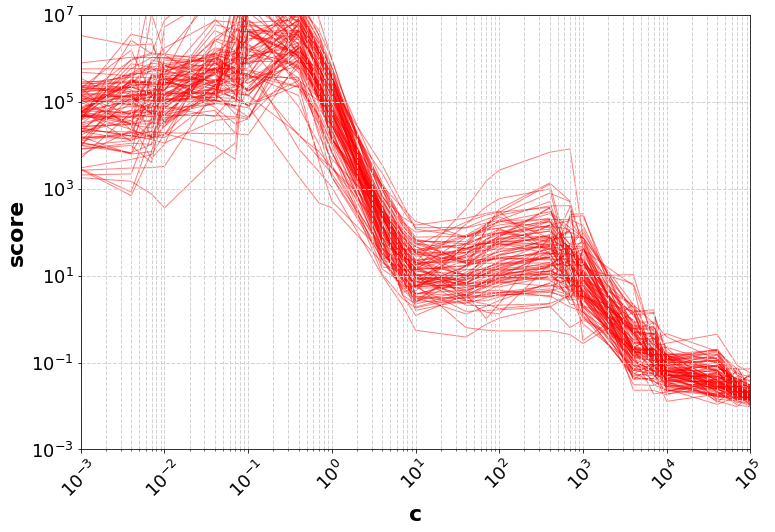

In [31]:
#generate a dens mesh
xmin=np.min(GammaDens)
xmax=np.max(GammaDens)
ymin=np.min(scoreY)
ymax=np.max(scoreY)

plt.figure(figsize=(12,8))

for yScore in scoreY:
    col='red'
    if (yScore[0]<yScore[-1]):
        col='blue'
    plt.plot(scoreX, yScore,   color=col  ,linewidth=1, zorder=-1, alpha=0.5)

#plt.plot(scoreX1, scoreY1,  color='black',linewidth=2)
#plt.plot(scoreX2, scoreY2,  color='blue',linewidth=2)

plt.xscale("log")#scalename)
plt.yscale("log")
#plt.axis([1.0e-6,1.0e6,ymin,ymax])
plt.axis([1.0e-3,1.0e5,1.0e-3,1.0e7])

plt.xticks(rotation=45,fontsize=18)
plt.yticks(fontsize=18)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
plt.xlabel(ptune,fontsize=22,fontweight="bold")
plt.ylabel("score",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)

plt.show()